In [256]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from imblearn.under_sampling import RandomUnderSampler
import shutil

In [257]:
file_path_normalisasi_extreme = 'D:\Tugas Akhir\Stroke\hasil_setelah_normalisasi.csv'
df_normalisasi_Extreme = pd.read_csv(file_path_normalisasi_extreme)

file_path_normalisasi_mild = 'D:\Tugas Akhir\Stroke\data_oversampled.csv'
df_normalisasi_mild = pd.read_csv(file_path_normalisasi_mild)

In [258]:
df_normalisasi_Extreme

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,0.7368,0,1,1,0,1,0,0,0.8012,0.5227,0,1,0,0,1
1,0,0.9649,0,1,1,0,1,0,1,0.2342,0.4380,0,0,1,0,1
2,1,0.4211,0,0,1,0,1,0,0,0.5358,0.4773,0,0,0,1,1
3,1,0.9474,1,0,1,0,0,1,1,0.5491,0.2624,0,0,1,0,1
4,0,0.9825,0,0,1,0,1,0,0,0.6050,0.3657,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3684,1,0.5614,0,0,1,0,1,0,1,0.1049,0.2149,0,0,1,0,0
3685,1,0.9825,0,0,1,0,0,1,0,0.3232,0.5930,0,0,1,0,0
3686,1,0.1754,0,0,1,0,0,1,1,0.1283,0.3988,0,0,1,0,0
3687,0,0.4561,0,0,1,0,1,0,1,0.5130,0.2955,0,1,0,0,0


In [259]:
df_normalisasi_mild

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,0,"0,7368",0,1,1,0,1,0,0,"0,8012","0,5227",0,1,0,0,1
1,0,"0,9649",0,1,1,0,1,0,1,"0,2342","0,438",0,0,1,0,1
2,1,"0,4211",0,0,1,0,1,0,0,"0,5358","0,4773",0,0,0,1,1
3,1,"0,9474",1,0,1,0,0,1,1,"0,5491","0,2624",0,0,1,0,1
4,0,"0,9825",0,0,1,0,1,0,0,"0,605","0,3657",0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5766,1,"0,8804",0,0,1,0,1,0,1,"0,6311","0,3073",1,0,0,0,1
5767,0,"0,8583",0,0,1,0,1,0,1,"0,1403","0,2548",1,0,0,0,1
5768,1,"0,9298",0,0,1,0,1,0,0,"0,0904","0,1904",1,0,0,0,1
5769,1,"0,9009",0,0,1,0,1,0,1,"0,2097","0,2386",1,0,0,0,1


In [260]:
# Menentukan jumlah baris yang akan dihapus secara acak (178 data dengan stroke = 1)
jumlah_hapus = 178

# Mengambil indeks baris dengan stroke = 1
indeks_stroke_1 = df_normalisasi_Extreme[df_normalisasi_Extreme['stroke'] == 1].index

# Memastikan jumlah data yang akan dihapus tidak melebihi jumlah data dengan stroke = 1
jumlah_hapus = min(jumlah_hapus, len(indeks_stroke_1))

# Menghapus baris dengan indeks yang telah dipilih
indeks_hapus = np.random.choice(indeks_stroke_1, size=jumlah_hapus, replace=False)
df_normalisasi_Extreme = df_normalisasi_Extreme.drop(index=indeks_hapus)

# Mengurutkan ulang indeks setelah penghapusan
df_normalisasi_Extreme = df_normalisasi_Extreme.reset_index(drop=True)

# Menampilkan informasi setelah penghapusan dan pengurutan
print(f"Jumlah baris sebelum dihapus: {len(df_normalisasi_Extreme) + jumlah_hapus}")
print(f"Jumlah baris setelah dihapus dan diurutkan: {len(df_normalisasi_Extreme)}")

# Hitung jumlah kelas 0 dan 1
jumlah_kelas = df_normalisasi_Extreme['stroke'].value_counts()

# Tampilkan hasil
print("Jumlah Kelas 0 (Tanpa Stroke):", jumlah_kelas[0])
print("Jumlah Kelas 1 (Dengan Stroke):", jumlah_kelas[1])

# Menyimpan DataFrame ke file CSV
output_csv_path = 'D:/Tugas Akhir/Stroke/hasil_setelah_penghapusan.csv'
df_normalisasi_Extreme.to_csv(output_csv_path, index=False)

# Copy file CSV ke direktori tujuan (misalnya, 'D:/Tugas Akhir/Stroke/')
output_final_path = 'D:/Tugas Akhir/Stroke/data_setelah_penghapusan_dan_urutan.csv'
shutil.copy(output_csv_path, output_final_path)

Jumlah baris sebelum dihapus: 3689
Jumlah baris setelah dihapus dan diurutkan: 3511
Jumlah Kelas 0 (Tanpa Stroke): 3481
Jumlah Kelas 1 (Dengan Stroke): 30


'D:/Tugas Akhir/Stroke/data_setelah_penghapusan_dan_urutan.csv'

In [261]:
df_normalisasi_Extreme

,gender,age,hypertension,heart_disease,ever_married,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type,avg_glucose_level,bmi,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,1,0.5088,0,0,1,0,1,0,0,0.2276,0.3306,0,0,0,1,1
1,1,0.6140,0,0,0,0,1,0,0,0.1570,0.5475,0,0,1,0,1
2,0,0.9649,0,1,1,0,0,1,0,0.9122,0.3967,0,1,0,0,1
3,1,0.8246,1,0,1,0,1,0,1,0.0896,0.2438,0,1,0,0,1
4,0,0.6667,0,1,1,0,1,0,1,0.6535,0.5207,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,1,0.5614,0,0,1,0,1,0,1,0.1049,0.2149,0,0,1,0,0
3507,1,0.9825,0,0,1,0,0,1,0,0.3232,0.5930,0,0,1,0,0
3508,1,0.1754,0,0,1,0,0,1,1,0.1283,0.3988,0,0,1,0,0
3509,0,0.4561,0,0,1,0,1,0,1,0.5130,0.2955,0,1,0,0,0


In [262]:
# Menampilkan informasi setelah penghapusan
print(f"Jumlah baris sebelum dihapus: {len(df_normalisasi_Extreme) + jumlah_hapus}")
print(f"Jumlah baris setelah dihapus: {len(df_normalisasi_Extreme)}")

# Hitung jumlah kelas 0 dan 1
jumlah_kelas_extreme = df_normalisasi_Extreme['stroke'].value_counts()
jumlah_kelas_Mild = df_normalisasi_mild['stroke'].value_counts()

# Tampilkan hasil
print("Jumlah Kelas 0 (Tanpa Stroke Pada Data Extreme):", jumlah_kelas_extreme[0])
print("Jumlah Kelas 1 (Dengan Stroke Pada Data Extreme):", jumlah_kelas_extreme[1])
print("Jumlah Kelas 0 (Tanpa Stroke Pada Data Mild):", jumlah_kelas_Mild[0])
print("Jumlah Kelas 1 (Dengan Stroke Pada Data Mild):", jumlah_kelas_Mild[1])

Jumlah baris sebelum dihapus: 3689
Jumlah baris setelah dihapus: 3511
Jumlah Kelas 0 (Tanpa Stroke Pada Data Extreme): 3481
Jumlah Kelas 1 (Dengan Stroke Pada Data Extreme): 30
Jumlah Kelas 0 (Tanpa Stroke Pada Data Mild): 3481
Jumlah Kelas 1 (Dengan Stroke Pada Data Mild): 2290


<Axes: >

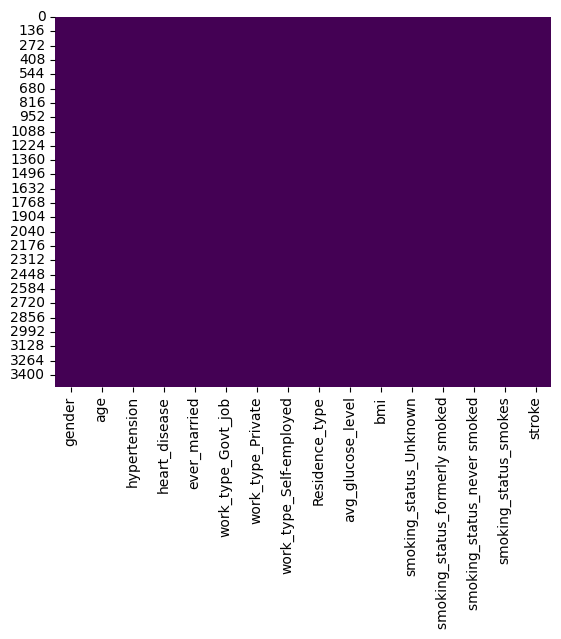

In [263]:
#Membaca missing values dengan menggunakan heatmap
sns.heatmap(df_normalisasi_Extreme.isnull(), cbar=False, cmap='viridis')

In [228]:
df = df_normalisasi_Extreme

# Ganti koma menjadi titik dalam kolom yang memerlukan perubahan
df['age'] = df['age'].astype(str).str.replace(',', '.')
df['avg_glucose_level'] = df['avg_glucose_level'].astype(str).str.replace(',', '.')
df['bmi'] = df['bmi'].astype(str).str.replace(',', '.')

# Konversi kolom ke tipe data float
df[['age', 'avg_glucose_level', 'bmi']] = df[['age', 'avg_glucose_level', 'bmi']].astype(float)

x = df.drop('stroke', axis=1)
y = df['stroke']

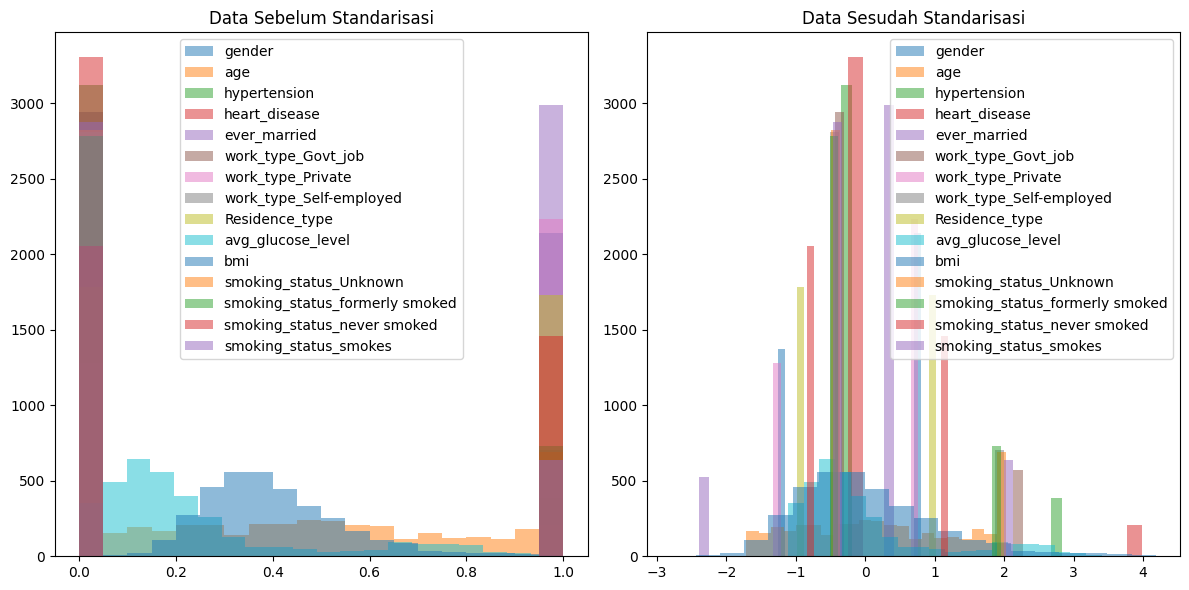

In [229]:
# Drop label target (misalnya, 'stroke') dari DataFrame
df_features = df_normalisasi_Extreme.drop('stroke', axis=1)

# Standarisasi data
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_features), columns=df_features.columns)

# Plot perbandingan data sebelum dan sesudah standarisasi
plt.figure(figsize=(12, 6))

# Plot data sebelum standarisasi
plt.subplot(1, 2, 1)
plt.title("Data Sebelum Standarisasi")
for column in df_features.columns:
    plt.hist(df_features[column], bins=20, alpha=0.5, label=column)
plt.legend()

# Plot data sesudah standarisasi
plt.subplot(1, 2, 2)
plt.title("Data Sesudah Standarisasi")
for column in df_scaled.columns:
    plt.hist(df_scaled[column], bins=20, alpha=0.5, label=column)
plt.legend()

plt.tight_layout()
plt.show()


In [230]:
# Tampilkan matriks kovarians
cov_matrix = np.cov(df_scaled, rowvar=False)
print("Matriks Kovarians:")
print(cov_matrix)

Matriks Kovarians:
[[ 1.00028490e+00 -5.24037374e-02 -4.52640540e-02 -9.87186787e-02
  -2.87936889e-02 -2.49322803e-03 -8.40806208e-03  1.24036372e-02
   9.08172298e-04 -6.21209785e-02 -2.61888765e-02 -6.07631043e-03
  -6.55423469e-02  8.59419683e-02 -3.46113032e-02]
 [-5.24037374e-02  1.00028490e+00  2.21530392e-01  2.52111268e-01
   2.67266152e-01 -9.34090778e-03 -2.18738475e-01  2.71439279e-01
  -7.02733690e-03  1.92804655e-01 -3.96513777e-02 -2.11672360e-02
   1.51249026e-01 -2.97181255e-02 -9.98267322e-02]
 [-4.52640540e-02  2.21530392e-01  1.00028490e+00  9.59466754e-02
   6.33615563e-02 -1.10167796e-02 -5.19157976e-02  7.25459990e-02
   9.92855740e-04  1.60310451e-01  1.06208745e-01 -8.49205550e-02
   3.10545880e-02  4.68999581e-02 -5.29460883e-03]
 [-9.87186787e-02  2.52111268e-01  9.59466754e-02  1.00028490e+00
   2.68808814e-02 -1.94169870e-02 -4.35179004e-02  7.02090765e-02
   3.93265860e-03  1.18849116e-01 -1.47711542e-02 -2.03798644e-02
   4.94174734e-02 -3.76549034e-02  1


Varian Setiap Variabel:
[1.0002849 1.0002849 1.0002849 1.0002849 1.0002849 1.0002849 1.0002849
 1.0002849 1.0002849 1.0002849 1.0002849 1.0002849 1.0002849 1.0002849
 1.0002849]

Kovarians Antar Variabel:
[[ 0.00000000e+00 -5.24037374e-02 -4.52640540e-02 -9.87186787e-02
  -2.87936889e-02 -2.49322803e-03 -8.40806208e-03  1.24036372e-02
   9.08172298e-04 -6.21209785e-02 -2.61888765e-02 -6.07631043e-03
  -6.55423469e-02  8.59419683e-02 -3.46113032e-02]
 [-5.24037374e-02  0.00000000e+00  2.21530392e-01  2.52111268e-01
   2.67266152e-01 -9.34090778e-03 -2.18738475e-01  2.71439279e-01
  -7.02733690e-03  1.92804655e-01 -3.96513777e-02 -2.11672360e-02
   1.51249026e-01 -2.97181255e-02 -9.98267322e-02]
 [-4.52640540e-02  2.21530392e-01  0.00000000e+00  9.59466754e-02
   6.33615563e-02 -1.10167796e-02 -5.19157976e-02  7.25459990e-02
   9.92855740e-04  1.60310451e-01  1.06208745e-01 -8.49205550e-02
   3.10545880e-02  4.68999581e-02 -5.29460883e-03]
 [-9.87186787e-02  2.52111268e-01  9.59466754e-

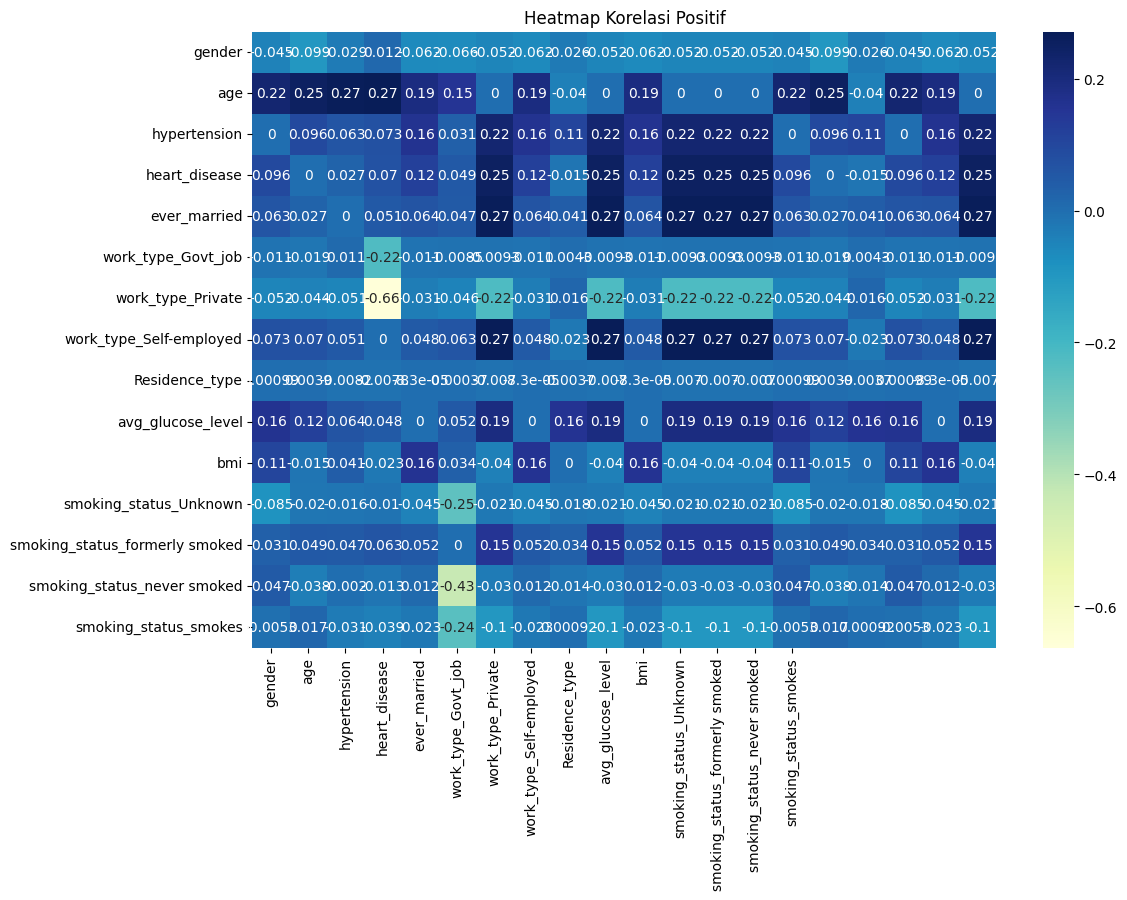

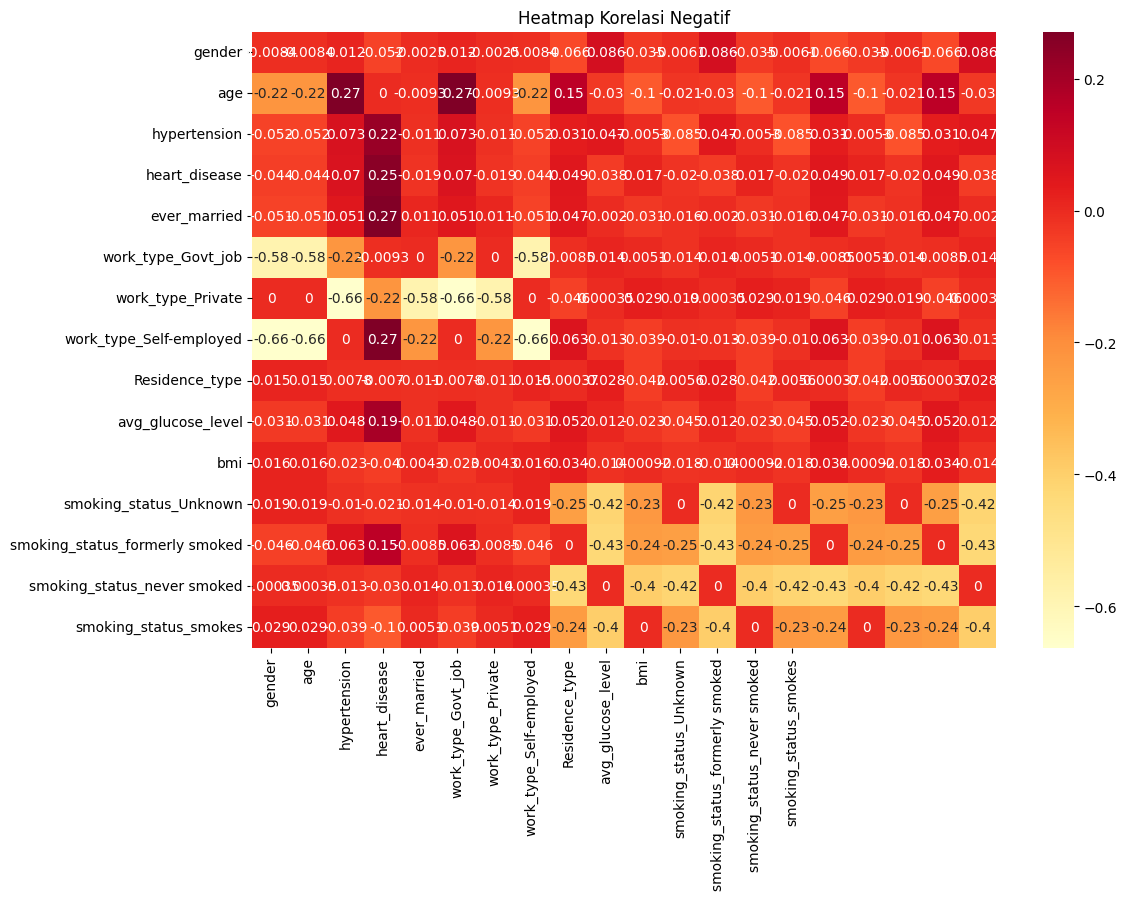

In [231]:
column_names = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
                'work_type_Govt_job', 'work_type_Private', 'work_type_Self-employed',
                'Residence_type', 'avg_glucose_level', 'bmi',
                'smoking_status_Unknown', 'smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']
threshold = 0.1
# Tampilkan elemen diagonal utama (varian)
variances = np.diag(cov_matrix)
print("\nVarian Setiap Variabel:")
print(variances)

# Tampilkan elemen non-diagonal (kovarians)
covariances = cov_matrix - np.diag(variances)
print("\nKovarians Antar Variabel:")
print(covariances)

# Temukan kolom-kolom dengan korelasi positif dan negatif
positive_correlation_indices = np.where(covariances > threshold)
negative_correlation_indices = np.where(covariances < -threshold)

# Tampilkan hasil
print("\nKolom dengan Korelasi Positif:")
for i, j in zip(positive_correlation_indices[0], positive_correlation_indices[1]):
    print(f"{column_names[i]} dan {column_names[j]}")

print("\nKolom dengan Korelasi Negatif:")
for i, j in zip(negative_correlation_indices[0], negative_correlation_indices[1]):
    print(f"{column_names[i]} dan {column_names[j]}")

# Plot korelasi positif
plt.figure(figsize=(12, 8))
plt.title("Heatmap Korelasi Positif")
sns.heatmap(covariances[:, positive_correlation_indices[1]], annot=True, xticklabels=column_names, yticklabels=column_names, cmap="YlGnBu")
plt.show()

# Plot korelasi negatif
plt.figure(figsize=(12, 8))
plt.title("Heatmap Korelasi Negatif")
sns.heatmap(covariances[:, negative_correlation_indices[1]], annot=True, xticklabels=column_names, yticklabels=column_names, cmap="YlOrRd")
plt.show()

In [232]:
# Hitung eigenvalues dan eigenvectors
pca = PCA()
pca.fit(df_scaled)
eigenvalues = pca.explained_variance_
eigenvectors = pca.components_

# Tampilkan eigenvalues beserta nama kolom
print("\nEigenvalues:")
for col, value in zip(df_normalisasi_Extreme.columns, eigenvalues):
    print(f"{col}: {round(value, 4)}")

# Tampilkan eigenvectors beserta nama kolom
print("\nEigenvectors:")
for i, vector in enumerate(eigenvectors):
    print(f"Principal Component {i + 1}:")
    for col, value in zip(df_normalisasi_Extreme.columns, vector):
        print(f"   {col}: {round(value, 4)}")




Eigenvalues:
gender: 2.0756
age: 1.5776
hypertension: 1.521
heart_disease: 1.2851
ever_married: 1.1942
work_type_Govt_job: 1.1755
work_type_Private: 1.0628
work_type_Self-employed: 1.0138
Residence_type: 0.9786
avg_glucose_level: 0.9199
bmi: 0.8483
smoking_status_Unknown: 0.7936
smoking_status_formerly smoked: 0.5581
smoking_status_never smoked: 0.0
smoking_status_smokes: 0.0

Eigenvectors:
Principal Component 1:
   gender: -0.0747
   age: 0.4579
   hypertension: 0.2307
   heart_disease: 0.2228
   ever_married: 0.2115
   work_type_Govt_job: 0.1787
   work_type_Private: -0.5278
   work_type_Self-employed: 0.4692
   Residence_type: -0.0141
   avg_glucose_level: 0.2122
   bmi: 0.0345
   smoking_status_Unknown: -0.0736
   smoking_status_formerly smoked: 0.2101
   smoking_status_never smoked: -0.0404
   smoking_status_smokes: -0.0943
Principal Component 2:
   gender: -0.2366
   age: 0.1763
   hypertension: 0.1234
   heart_disease: 0.2179
   ever_married: 0.116
   work_type_Govt_job: -0.375

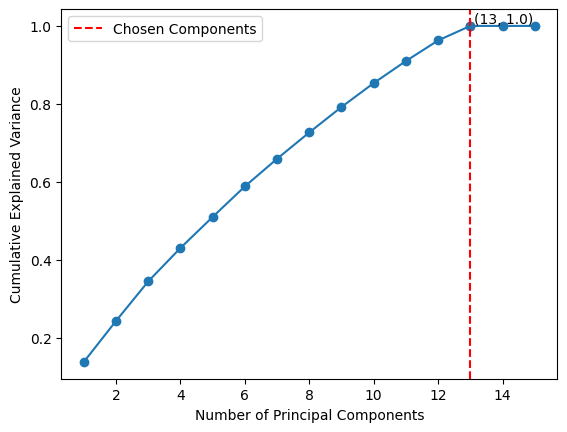

In [233]:
# Plotting cumulative explained variance
num_components = len(pca.explained_variance_ratio_)
plt.plot(range(1, num_components + 1), np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

# Tambahkan garis putus-putus pada nilai 13 pada sumbu x
chosen_components = 13
plt.axvline(x=chosen_components, color='r', linestyle='--', label='Chosen Components')

# Tambahkan titik pada nilai 13 untuk menunjukkan pilihan komponen utama
plt.scatter(chosen_components, np.cumsum(pca.explained_variance_ratio_)[chosen_components-1], color='r')

# Tampilkan label pada titik
plt.text(chosen_components + 0.1, np.cumsum(pca.explained_variance_ratio_)[chosen_components-1], f'({chosen_components}, {np.round(np.cumsum(pca.explained_variance_ratio_)[chosen_components-1], 2)})', verticalalignment='bottom')

plt.legend()
plt.show()

In [234]:
# Lakukan PCA
n_components = 13  # Ganti dengan jumlah komponen utama yang diinginkan
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(df_scaled)


In [235]:
# Tampilkan explained variance ratio
print("Explained Variance Ratio:")
print(pca.explained_variance_ratio_)

# Tampilkan hasil penjumlahan explained variance ratio (kumulatif)
cumulative_explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print("\nCumulative Explained Variance Ratio:")
print(cumulative_explained_variance_ratio)

# Tampilkan komponen utama
print("\nPrincipal Components:")
print(pca.components_)

# Kolom Tambahan: Tampilkan kontribusi variabel terhadap komponen utama
for i, ratio in enumerate(pca.explained_variance_ratio_):
    print(f"Komponen {i + 1} ({df_normalisasi_Extreme.columns[i]}) - Proporsi Varians: {ratio:.4f}")

Explained Variance Ratio:
[0.13833588 0.10514267 0.10136989 0.08565127 0.07959293 0.07834131
 0.07083285 0.0675704  0.06522339 0.06131099 0.05654024 0.05289137
 0.03719681]

Cumulative Explained Variance Ratio:
[0.13833588 0.24347855 0.34484844 0.43049971 0.51009264 0.58843395
 0.6592668  0.7268372  0.79206059 0.85337158 0.90991182 0.96280319
 1.        ]

Principal Components:
[[-7.47079591e-02  4.57939079e-01  2.30735774e-01  2.22752785e-01
   2.11545578e-01  1.78735663e-01 -5.27783396e-01  4.69169379e-01
  -1.41091208e-02  2.12215027e-01  3.44989782e-02 -7.35652674e-02
   2.10064200e-01 -4.03529631e-02 -9.42756055e-02]
 [-2.36576192e-01  1.76287899e-01  1.23430089e-01  2.17859198e-01
   1.16041974e-01 -3.75490730e-01  3.81454881e-01 -1.11750947e-01
  -2.24324878e-02  1.91133943e-01  1.19027989e-01  1.34525781e-01
   3.77054664e-01 -5.47194089e-01  1.64041754e-01]
 [ 5.40770096e-03  1.72674159e-01  2.93208834e-01  1.29383267e-01
   1.41644702e-01 -3.19772759e-01  3.29339375e-01 -1.00

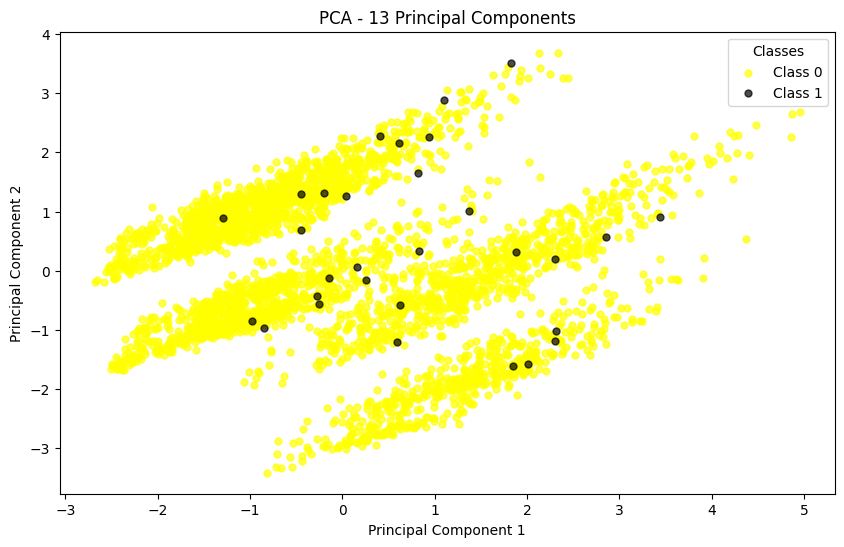

In [236]:
# Buat DataFrame hasil PCA
df_pca_result = pd.DataFrame(data=X_pca, columns=[f"PC{i+1}" for i in range(13)])
df_pca_result['stroke'] = y  # Tambahkan kolom target ke hasil PCA

# # Simpan hasil PCA ke file CSV
# df_pca_result.to_csv('data_setelah_pca.csv', index=False)

# # Copy file CSV ke direktori tujuan (misalnya, 'D:/Tugas Akhir/Stroke/')
# shutil.copy('data_setelah_pca.csv', 'D:/Tugas Akhir/Stroke/data_setelah_pca_extreme.csv')

# Plot hasil PCA
plt.figure(figsize=(10, 6))

# Pisahkan kelas 0 dan kelas 1
class_0 = df_pca_result[df_pca_result['stroke'] == 0]
class_1 = df_pca_result[df_pca_result['stroke'] == 1]

# Plot kelas 0 dengan warna kuning
plt.scatter(class_0['PC1'], class_0['PC2'], c='yellow', marker='o', s=25, alpha=0.7, label='Class 0')

# Plot kelas 1 dengan warna hitam
plt.scatter(class_1['PC1'], class_1['PC2'], c='black', marker='o', s=25, alpha=0.7, label='Class 1')

# Tambahkan legenda untuk kelas
plt.legend(title="Classes")

# Tambahkan label dan judul
plt.title('PCA - 13 Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [237]:
df_pca_result

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,stroke
0,1.821576,3.514494,1.487104,0.807637,-0.898996,0.413953,-1.252312,0.671899,1.907495,0.771696,-2.520997,0.437977,-0.805319,1
1,2.304108,-1.192072,1.770786,-0.188310,0.977614,0.282270,1.576191,0.718777,-0.877226,0.469202,1.507451,-0.604147,-1.441191,1
2,-1.288703,0.896253,-0.984612,-1.588378,-0.176223,1.195154,-0.851396,0.598484,-0.588870,-1.073772,0.493040,-0.262209,-0.462854,1
3,0.814487,1.653225,0.917569,-0.367070,-0.892897,-1.298310,-0.518245,-0.201198,-1.358432,1.503736,2.813179,0.029321,0.015117,1
4,-0.248689,-0.556126,1.552882,-0.789870,-0.005942,-0.232809,-0.524850,-0.422751,-1.353829,0.177803,-0.113627,0.819452,1.869283,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,-0.946527,-0.956589,1.157011,-0.913332,0.198073,-0.673180,-1.135301,-0.170882,-1.143255,0.341484,0.070986,-0.251466,0.237787,0
3507,2.350622,-1.210074,0.992860,-0.630673,0.910844,-0.124931,1.489888,-1.021715,0.419983,-0.313469,-0.963936,0.431840,1.212042,0
3508,0.751663,-2.100977,0.186453,-0.923554,0.837881,-0.927169,0.970742,0.536279,-0.901032,-0.592355,-0.442626,0.441774,-1.152889,0
3509,0.049763,1.926116,0.313960,-0.025345,-1.462786,-1.015849,-0.581923,0.735251,-0.502469,-0.687576,-0.288112,-1.471254,-0.455520,0


In [238]:
# Hitung jumlah data untuk target stroke 0 dan 1
class_counts_pca = df_pca_result['stroke'].value_counts()
# Cetak jumlah data untuk target stroke 0 dan 1
print(f'Jumlah data untuk target stroke 0: {class_counts_pca[0]}')
print(f'Jumlah data untuk target stroke 1: {class_counts_pca[1]}')

Jumlah data untuk target stroke 0: 3481
Jumlah data untuk target stroke 1: 30


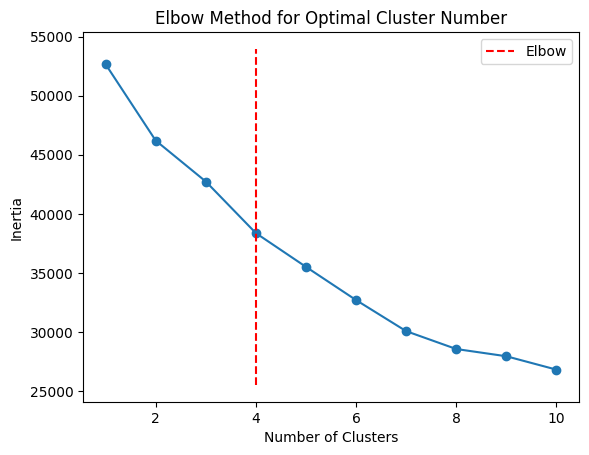

Jumlah kluster optimal (elbow): 4


In [239]:
import numpy as np
from kneed import KneeLocator

# Range jumlah cluster yang akan diuji
range_clusters = range(1, 11)  # Misalnya, uji dari 1 hingga 10 clusters

# Simpan inersia untuk setiap jumlah cluster
inertia = []

for n_clusters in range_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Gunakan KneeLocator untuk menemukan elbow secara otomatis
kl = KneeLocator(range_clusters, inertia, curve="convex", direction="decreasing")

# Plot Elbow Method dan tandai titik elbow
plt.plot(range_clusters, inertia, marker='o')
plt.title('Elbow Method for Optimal Cluster Number')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.vlines(kl.elbow, plt.ylim()[0], plt.ylim()[1], linestyles='dashed', colors='red', label='Elbow')
plt.legend()
plt.show()

# Tampilkan jumlah kluster optimal
print(f"Jumlah kluster optimal (elbow): {kl.elbow}")


In [240]:
from sklearn import metrics
n_clusters = 6

# Range n_init yang akan diuji
range_n_init = [10, 20, 30, 40, 50]

# Simpan metrik evaluasi untuk setiap n_init
evaluation_metrics = {}

for n_init in range_n_init:
    kmeans = KMeans(n_clusters=n_clusters, n_init=n_init, random_state=42)  
    cluster_labels = kmeans.fit_predict(X_pca)
    
    # Hitung dan simpan metrik evaluasi, misalnya, silhouette score
    silhouette_score = metrics.silhouette_score(X_pca, cluster_labels)
    evaluation_metrics[n_init] = silhouette_score

# Cetak hasil evaluasi untuk melihat sejauh mana hasil klastering konsisten
print("Evaluation Metrics:")
for n_init, score in evaluation_metrics.items():
    print(f"n_init={n_init}: Silhouette Score={score}")


Evaluation Metrics:
n_init=10: Silhouette Score=0.18326160279126533
n_init=20: Silhouette Score=0.18326160279126533
n_init=30: Silhouette Score=0.18326160279126533
n_init=40: Silhouette Score=0.18326160279126533
n_init=50: Silhouette Score=0.18326160279126533


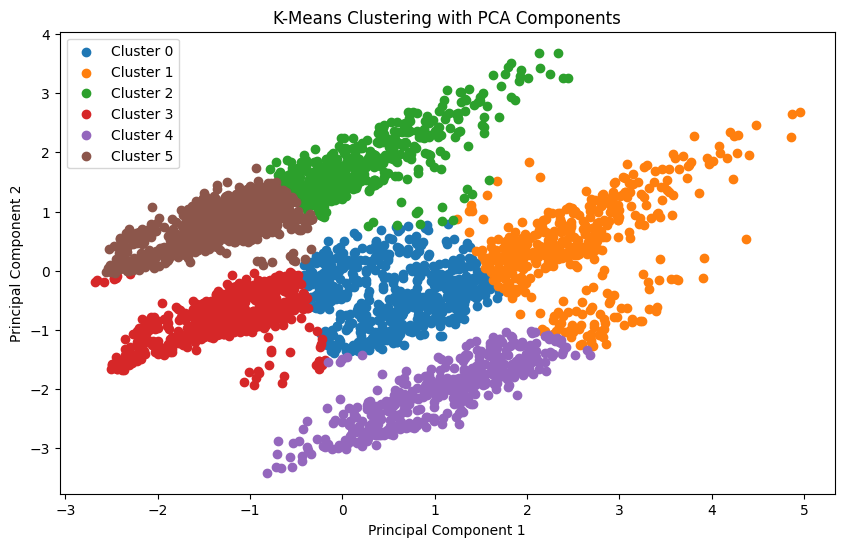

In [241]:
# Bagian 2: K-Means
# Pilih fitur hasil PCA (dalam contoh ini, ambil PC1 dan PC2)
X_pca = df_pca_result[['PC1', 'PC2']].values

# Inisialisasi model K-Means dengan jumlah cluster yang diinginkan
kmeans = KMeans(n_clusters=6, n_init=30)

# Menentukan label cluster untuk setiap data hasil PCA
cluster_labels = kmeans.fit_predict(X_pca)  # X_pca adalah hasil PCA

# Menyatukan label klaster ke dalam dataset hasil PCA
df_pca_result['Cluster'] = cluster_labels

# Visualisasi hasil klastering
plt.figure(figsize=(10, 6))

# Plot klaster
for cluster in range(6):
    cluster_data = df_pca_result[df_pca_result["Cluster"] == cluster]
    plt.scatter(cluster_data["PC1"], cluster_data["PC2"], label=f'Cluster {cluster}')

# Tambahkan label dan judul
plt.title('K-Means Clustering with PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [242]:
# Hitung jumlah data untuk target stroke 0 dan 1 setelah klastering
class_counts_kmeans = df_pca_result['stroke'].value_counts()

# Cetak jumlah data untuk target stroke 0 dan 1 setelah klastering
print(f'Jumlah data untuk target stroke 0: {class_counts_kmeans[0]}')
print(f'Jumlah data untuk target stroke 1: {class_counts_kmeans[1]}')

Jumlah data untuk target stroke 0: 3481
Jumlah data untuk target stroke 1: 30


In [243]:
df_pca_result

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,stroke,Cluster
0,1.821576,3.514494,1.487104,0.807637,-0.898996,0.413953,-1.252312,0.671899,1.907495,0.771696,-2.520997,0.437977,-0.805319,1,2
1,2.304108,-1.192072,1.770786,-0.188310,0.977614,0.282270,1.576191,0.718777,-0.877226,0.469202,1.507451,-0.604147,-1.441191,1,4
2,-1.288703,0.896253,-0.984612,-1.588378,-0.176223,1.195154,-0.851396,0.598484,-0.588870,-1.073772,0.493040,-0.262209,-0.462854,1,5
3,0.814487,1.653225,0.917569,-0.367070,-0.892897,-1.298310,-0.518245,-0.201198,-1.358432,1.503736,2.813179,0.029321,0.015117,1,2
4,-0.248689,-0.556126,1.552882,-0.789870,-0.005942,-0.232809,-0.524850,-0.422751,-1.353829,0.177803,-0.113627,0.819452,1.869283,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3506,-0.946527,-0.956589,1.157011,-0.913332,0.198073,-0.673180,-1.135301,-0.170882,-1.143255,0.341484,0.070986,-0.251466,0.237787,0,3
3507,2.350622,-1.210074,0.992860,-0.630673,0.910844,-0.124931,1.489888,-1.021715,0.419983,-0.313469,-0.963936,0.431840,1.212042,0,4
3508,0.751663,-2.100977,0.186453,-0.923554,0.837881,-0.927169,0.970742,0.536279,-0.901032,-0.592355,-0.442626,0.441774,-1.152889,0,4
3509,0.049763,1.926116,0.313960,-0.025345,-1.462786,-1.015849,-0.581923,0.735251,-0.502469,-0.687576,-0.288112,-1.471254,-0.455520,0,2


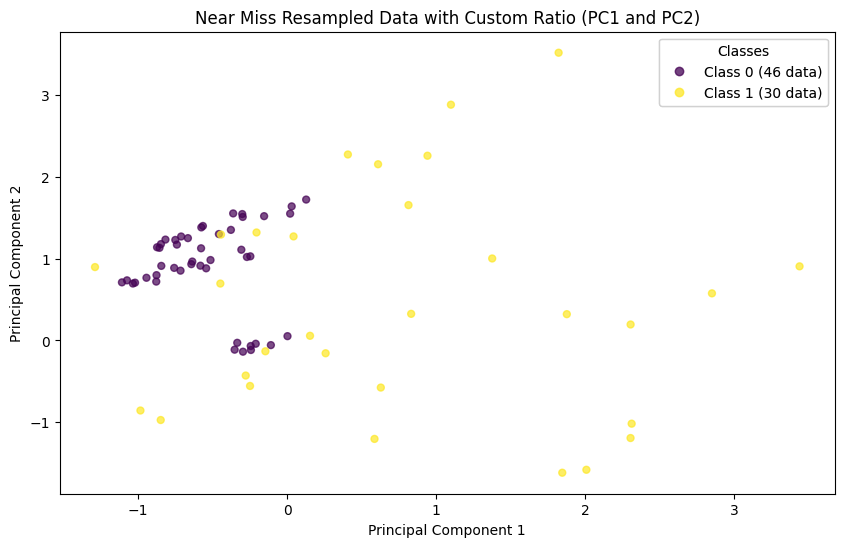

In [244]:
from imblearn.under_sampling import NearMiss

# Bagian 3: Near Miss
# Pilih fitur hasil PCA (sesuaikan dengan jumlah komponen utama yang digunakan)
X_pca = df_pca_result.drop(['stroke', 'Cluster'], axis=1).values  # Hapus kolom 'Cluster'
y = df_pca_result['stroke'].values
cluster_labels = df_pca_result['Cluster'].values  # Simpan label kluster sebelum dihapus

# Inisialisasi model Near Miss dengan rasio kustom (misalnya, 0.2 untuk mendapatkan rasio 80:20)
nm_custom_ratio = NearMiss(sampling_strategy=0.65, n_neighbors=3, version=2)

# Resample data menggunakan Near Miss dengan rasio kustom
X_resampled_custom, y_resampled_custom = nm_custom_ratio.fit_resample(X_pca, y)

# Buat DataFrame baru dari data yang sudah di-resample dengan rasio kustom
df_resampled_custom = pd.DataFrame(data=X_resampled_custom, columns=[f"PC{i+1}" for i in range(X_resampled_custom.shape[1])])
df_resampled_custom['stroke'] = y_resampled_custom

# Tambahkan kembali kolom 'Cluster'
df_resampled_custom['Cluster'] = cluster_labels[:len(df_resampled_custom)]

# Menyimpan hasil Near Miss Resampling dengan rasio kustom ke file CSV
result_csv_path_resampled_custom = 'D:/Tugas Akhir/Stroke/data_hasil_nearmiss.csv'
df_resampled_custom.to_csv(result_csv_path_resampled_custom, index=False)

# Hitung jumlah data untuk masing-masing kelas setelah resampling dengan rasio kustom
count_class_0_custom = df_resampled_custom[df_resampled_custom['stroke'] == 0].shape[0]
count_class_1_custom = df_resampled_custom[df_resampled_custom['stroke'] == 1].shape[0]

# Visualisasi data setelah resampling dengan rasio kustom
plt.figure(figsize=(10, 6))
scatter_resampled_custom = plt.scatter(df_resampled_custom['PC1'], df_resampled_custom['PC2'], c=df_resampled_custom['stroke'], cmap='viridis', marker='o', s=25, alpha=0.7)

# Tambahkan legenda untuk kelas
legend_resampled_custom = plt.legend(*scatter_resampled_custom.legend_elements(), title="Classes")
# Tambahkan keterangan jumlah data pada legend
legend_resampled_custom.texts[0].set_text(f'Class 0 ({count_class_0_custom} data)')
legend_resampled_custom.texts[1].set_text(f'Class 1 ({count_class_1_custom} data)')

plt.gca().add_artist(legend_resampled_custom)

# Tambahkan label dan judul
plt.title('Near Miss Resampled Data with Custom Ratio (PC1 and PC2)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


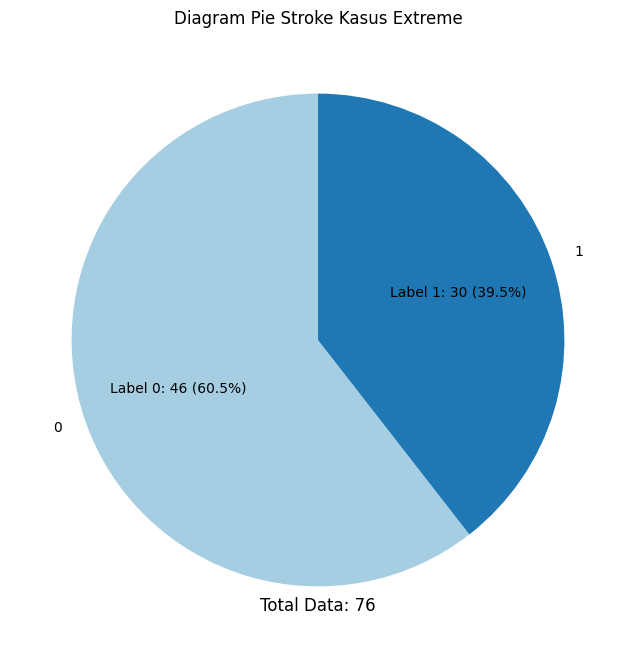

In [245]:
# Hitung frekuensi nilai unik dalam kolom 'stroke'
stroke_counts = df_resampled_custom['stroke'].value_counts()

# Plotting diagram pie untuk kolom 'stroke'
plt.figure(figsize=(8, 8))
pie_chart, _, autotexts = plt.pie(stroke_counts, labels=stroke_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, textprops=dict(color="black"))

# Tambahkan keterangan total data
total_data = len(df_resampled_custom['stroke'])
plt.text(0, -1.1, f'Total Data: {total_data}', fontsize=12, ha='center')

# Tambahkan keterangan jumlah data pada label 0 pada legenda
label_0_count = stroke_counts[0]
autotexts[0].set_text(f'Label 0: {label_0_count} ({stroke_counts[0]/total_data*100:.1f}%)')

# Tambahkan keterangan jumlah data pada label 1 pada legenda
label_1_count = stroke_counts[1]
autotexts[1].set_text(f'Label 1: {label_1_count} ({stroke_counts[1]/total_data*100:.1f}%)')

# Berikan judul
plt.title('Diagram Pie Stroke Kasus Extreme')

# Tampilkan diagram
plt.show()
